In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    fig.axes[0].axis('off')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_135383/519161279.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path_data+'hand.png')


Data type: uint8
Min. value: 3
Max value: 224


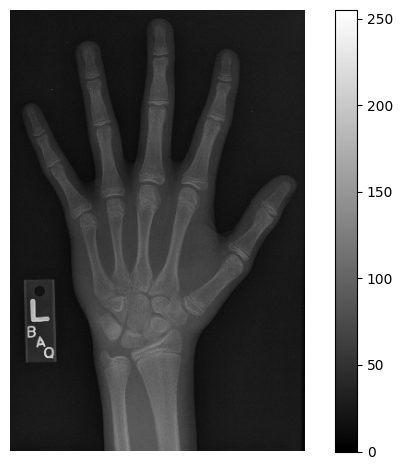

"\nGood work! Although only a coarse descriptor, the range of intensities can help you get a quick feel for your image's content.\n"

In [4]:
# exercise 01

"""
Intensity

In this chapter, we will work with a hand radiograph from a 2017 Radiological Society of North America competition. X-ray absorption is highest in dense tissue such as bone, so the resulting intensities should be high. Consequently, images like this can be used to predict "bone age" in children.

To start, let's load the image and check its intensity range.

The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (uint8) can take values in the range of 0 to 255. A colorbar can be helpful for connecting these values to the visualized image.

All exercises in this chapter have the following imports:

import imageio
import numpy as np
import matplotlib.pyplot as plt

"""

# Instructions

"""

    Load the image "hand-xray.jpg" using imageio.
    Print the image's data type (dtype), minimum (min()) and maximum intensity (max()).
    Plot the image using plt.imshow(). Explicitly set the colormap's minimum (0) and maximum (255) values using the vmin and vmax arguments.
    Add a colorbar using plt.colorbar(), then render the plot using the custom function format_and_render_plot(). This has been done for you.


"""

# solution

# Load the hand radiograph
im = imageio.imread(path_data+'hand.png')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax=255, cmap='gray')
plt.colorbar()
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Good work! Although only a coarse descriptor, the range of intensities can help you get a quick feel for your image's content.
"""

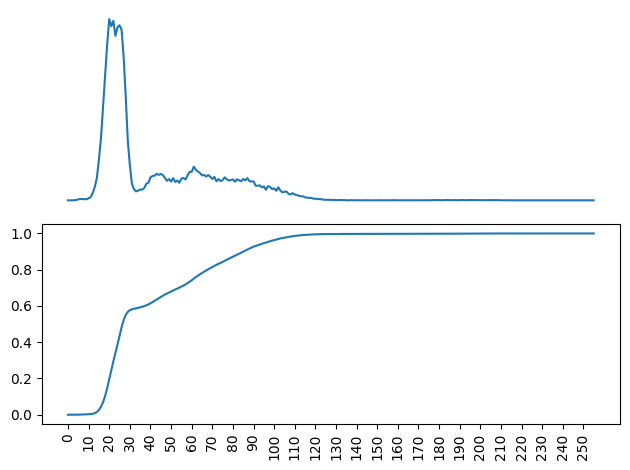

'\nGreat work. You can see the data is clumped into a few separate distributions, consisting of background noise, skin, bone, and artifacts. Sometimes we can separate these well with global thresholds (foreground/background); other times the distributions overlap quite a bit (skin/bone).\n'

In [5]:
# exercise 02

"""
Histograms

Histograms display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The area under a histogram is called the cumulative distribution function. It measures the frequency with which a given range of pixel intensities occurs.

For this exercise, describe the intensity distribution in im by calculating the histogram and cumulative distribution function and displaying them together.
"""

# Instructions

"""


    Import scipy.ndimage as ndi.

    Generate a 256-bin histogram of im which covers the full range of np.uint8 values.

    Calculate the cumulative distribution function for im. First, find the cumulative sum of hist, then divide by the total number of pixels in hist.

    Plot hist and cdf on separate subplots. This has been done for you.

"""

# solution

# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
plt.xticks(range(0,256, 10), rotation=90)
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Great work. You can see the data is clumped into a few separate distributions, consisting of background noise, skin, bone, and artifacts. Sometimes we can separate these well with global thresholds (foreground/background); other times the distributions overlap quite a bit (skin/bone).
"""

![foot_xray](/home/nero/Documents/Estudos/DataCamp/Python/courses/biomedical-image-analysis-in-python/Ch2_L2_EqHist.png)

In [19]:
hist = ndi.histogram(im, min=0, max=255, bins=256)
cdf = hist.cumsum() / hist.sum()
im = cdf[im] * 255

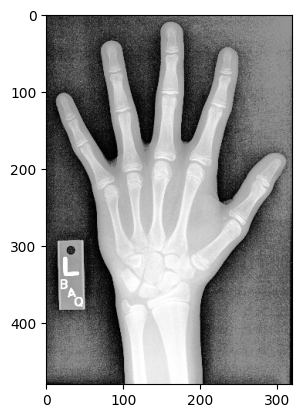

In [25]:
plt.imshow(im, cmap='gray')

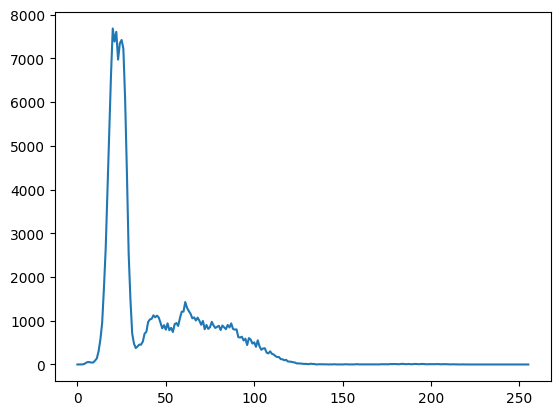

In [21]:
plt.plot(hist)

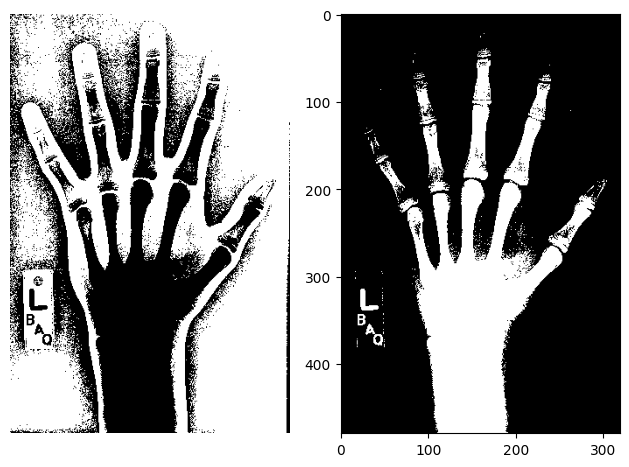

'\nWell done! You can chain logic together to make some quite complex masks.\n'

In [31]:
# exercise 03

"""
Create a mask

Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

For this exercise, try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (im has been equalized to utilize the whole intensity range.)

Below is the histogram of im colored by the segments we will plot.

Histogram of equalized foot x-ray 
"""

# Instructions

"""

    Create a bone mask by selecting pixels with intensities greater than or equal to 145.
    Create a skin mask by selecting pixels with intensities greater than or equal to 45 and less than 145.
    Plot the skin and bone masks in grayscale.


"""

# solution

# Create skin and bone masks
mask_bone = im >= 200
mask_skin = (im >=45) & (im < 200)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Well done! You can chain logic together to make some quite complex masks.
"""

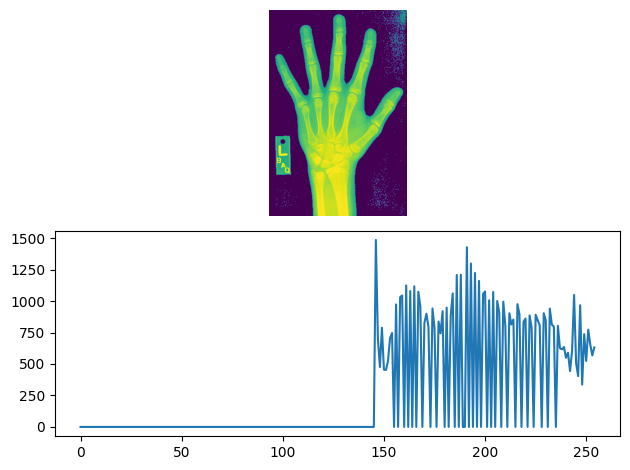

'\nNice! Sometimes simpler methods for applying a mask such as multiplication (e.g., im * mask_bone) will meet your needs, but np.where() is an excellent tool to have in your arsenal.\n'

In [32]:
# exercise 04

"""
Apply a mask

Although masks are binary, they can be applied to images to filter out pixels where the mask is False.

NumPy's where() function is a flexible way of applying masks. It takes three arguments:

np.where(condition, x, y)

condition, x and y can be either arrays or single values. This allows you to pass through original image values while setting masked values to 0.

Let's practice applying masks by selecting the bone-like pixels from the hand x-ray (im).
"""

# Instructions

"""

    Create a Boolean bone mask by selecting pixels greater than or equal to 145.
    Apply the mask to your image using np.where(). Values not in the mask should be set to 0.
    Create a histogram of the masked image. Use the following arguments to select only non-zero pixels: min=1, max=255, bins=255.
    Plot the masked image and the histogram. This has been done for you.

"""

# solution

# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Screen out non-bone pixels from "im"
mask_bone = im >= 145
im_bone = np.where(im >= 145, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone)
axes[1].plot(hist)
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Nice! Sometimes simpler methods for applying a mask such as multiplication (e.g., im * mask_bone) will meet your needs, but np.where() is an excellent tool to have in your arsenal.
"""

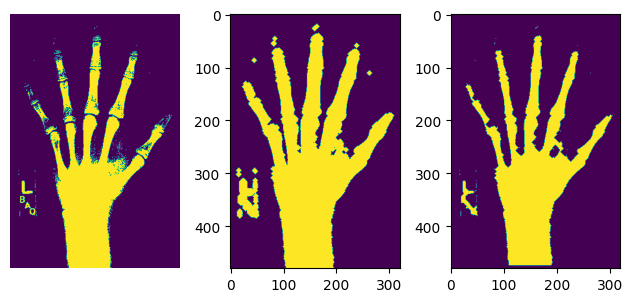

'\nVery nice! Dilation, erosion, and closing are useful techniques when you want to fine-tune your masks.\n'

In [34]:
# exercise 05

"""
Tune a mask

Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

    binary_dilation: Add pixels along edges
    binary_erosion: Remove pixels along edges
    binary_opening: Erode then dilate, "opening" areas near edges
    binary_closing: Dilate then erode, "filling in" holes

For this exercise, create a bone mask then tune it to include additional pixels.

For the remaining exercises, we have run the following import for you:

import scipy.ndimage as ndi

"""

# Instructions

"""

    Create a bone by selecting pixels from im that are greater than or equal to 145.
    Use ndi.binary_dilation() to increase the size of mask_bone. Set the number of iterations to 5 to perform the dilation multiple times.
    Use ndi.binary_closing() to fill in holes in mask_bone. Set the number of iterations to 5 to holes up to 10 pixels wide.
    Plot the original and tuned masks.

"""

# solution

# Create and tune bone mask
mask_bone = im >= 200
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Very nice! Dilation, erosion, and closing are useful techniques when you want to fine-tune your masks.
"""

![filter_conv](/home/nero/Documents/Estudos/DataCamp/Python/courses/biomedical-image-analysis-in-python/Ch2_L3_ConvolutionGif.gif)

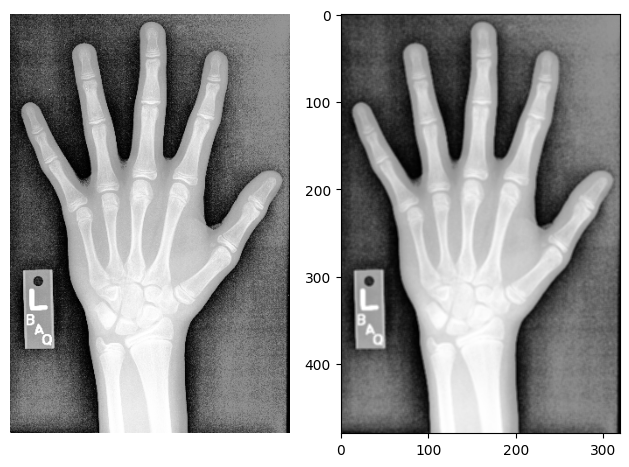

'\nGreat. The size and pattern of the filter weights control the effect it will have on your image.\n'

In [36]:
# exercise 06

"""
Filter convolutions

Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.

2D array convolution. By Michael Plotke [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], from Wikimedia Commons

For this exercise, smooth the foot radiograph. First, specify the weights to be used. (These are called "footprints" and "kernels" as well.) Then, convolve the filter with im and plot the result.
"""

# Instructions

"""
Create a three by three array of filter weights. Set each element to 0.11 to perform mean filtering (also called "uniform filtering").
---
Convolve im with weights using ndi.convolve().
---
Plot the original and mean-filtered images.
"""

# solution

# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_filt, cmap='gray')
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Great. The size and pattern of the filter weights control the effect it will have on your image.
"""

In [39]:
# exercise 07

"""
Filter functions

Convolutions rely on a set of weights, but filtering can also be done using functions such as the mean, median and maximum. Just like with convolutions, filter functions will update each pixel value based on its local neighborhood.

Consider the following lines of code:

im = np.array([[93, 36,  87], 
               [18, 49,  51],
               [45, 32,  63]])

im_filt = ____

assert im_filt[1,1] == 49

Which of the following statements should go in the blank so that the assert statement evaluates to True?
"""

# Instructions

"""
Possible answers:
    
    ndi.maximum_filter(im, size=3)
    
    ndi.uniform_filter(im, size=3)
    
    ndi.percentile_filter(im, 60, size=3)
    
    ndi.median_filter(im, size=3)
"""

# solution

tt = np.array([[93, 36,  87], 
               [18, 49,  51],
               [45, 32,  63]])

im_filt = ndi.median_filter(tt, size=3)

assert im_filt[1,1] == 49

#----------------------------------#

# Conclusion

"""
Great job! The median filter will return the median value of the 3x3 neighborhood. Note that the values on the edges will vary based on the mode setting of your filter.
"""

'\nGreat job! The median filter will return the median value of the 3x3 neighborhood. Note that the values on the edges will vary based on the mode setting of your filter.\n'

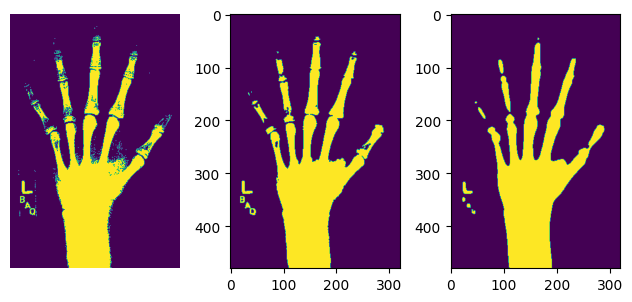

'\nGreat work! Many analyses can benefit from an initial smoothing of the data.\n'

In [41]:
# exercise 08

"""
Smoothing

Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.
(https://en.wikipedia.org/wiki/Signal-to-noise_ratio)
The width of the distribution is controlled by the sigma argument, with higher values leading to larger smoothing effects.

For this exercise, test the effects of applying Gaussian filters to the foot x-ray before creating a bone mask.
"""

# Instructions

"""

    Convolve im with Gaussian filters of size sigma=1 and sigma=3.
    Plot the "bone masks" of im, im_s1, and im_s3 (i.e., where intensities are greater than or equal to 145).

"""

# solution

# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 200)
axes[1].imshow(im_s1 >= 200)
axes[2].imshow(im_s3 >= 200)
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Great work! Many analyses can benefit from an initial smoothing of the data.
"""

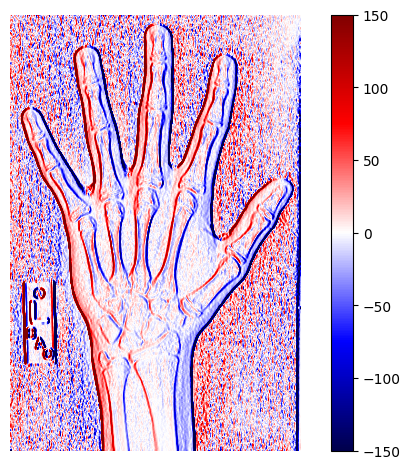

'\nPretty cool, right? Take a close look at where the edges are - and are not - highlighted to reinforce your understanding of how this detector works.\n'

In [42]:
# exercise 09

"""
Detect edges (1)

Filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).

In the case of edge detection, that pattern is a change in intensity along a plane. A filter detecting horizontal edges might look like this:

weights = [[+1, +1, +1],
           [ 0,  0,  0],
           [-1, -1, -1]]

For this exercise, create a vertical edge detector and see how well it performs on the hand x-ray (im).
"""

# Instructions

"""

    Create a 3x3 array of filter weights that detects when intensity changes from the left to right. Use only the values 1, 0 and -1.
    Convolve im with the edge detector.
    Plot the horizontal edges with the seismic colormap. Use vmin=-150 and vmax=150 to control adjust your colormap scale.
    Add a colorbar and render the results.

"""

# solution

# Set weights to detect vertical edges
weights = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Pretty cool, right? Take a close look at where the edges are - and are not - highlighted to reinforce your understanding of how this detector works.
"""

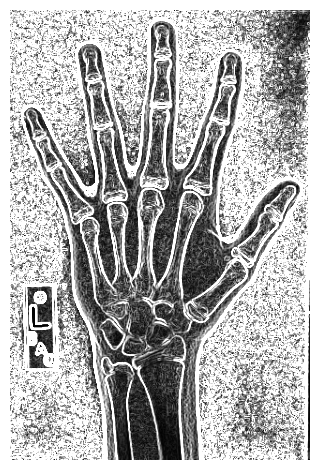

'\nCongratulations! In this chapter, you learned how to modify and extract parts of images based on their location and intensity. You are now ready to begin analyzing individual images!\n'

In [43]:
# exercise 10

"""
Detect edges (2)

Edge detection can be performed along multiple axes, then combined into a single edge value. For 2D images, the horizontal and vertical "edge maps" can be combined using the Pythagorean theorem:

One popular edge detector is the Sobel filter. The Sobel filter provides extra weight to the center pixels of the detector:
(https://en.wikipedia.org/wiki/Sobel_operator)
weights = [[ 1,  2,  1], 
           [ 0,  0,  0],
           [-1, -2, -1]]

For this exercise, improve upon your previous detection effort by merging the results of two Sobel-filtered images into a composite edge map.
"""

# Instructions

"""

    Apply ndi.sobel() to im along the first and second axes.
    Calculate the overall edge magnitude using the Pythagorean theorem. Use np.sqrt() and np.square().
    Display the magnitude image. Use a grayscale colormap and set vmax to 75.

"""

# solution

# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 = ndi.sobel(im, axis=1)

# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0)+ np.square(sobel_ax1))

# Plot edge magnitude
plt.imshow(edges, cmap='gray', vmax=75)
format_and_render_plot()

#----------------------------------#

# Conclusion

"""
Congratulations! In this chapter, you learned how to modify and extract parts of images based on their location and intensity. You are now ready to begin analyzing individual images!
"""